# Let's explore the Victoria Fire History dataset produced by DECCA and available on the Vic Data website 

In [1]:
# Setup

%matplotlib inline
import folium
import geopandas as gpd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Load the data and view first 5 rows

fire_history = gpd.read_file("ll_gda94/esrishape/whole_of_dataset/victoria/FIRE/FIRE_HISTORY.shp")
fire_history.head()

,FIRETYPE,SEASON,FIRE_NO,NAME,START_DATE,STRTDATIT,TREAT_TYPE,FIRE_SVRTY,FIRE_COVER,FIREKEY,CR_DATE,UPDATEDATE,AREA_HA,METHOD,METHD_CMNT,ACCURACY,DSE_ID,CFA_ID,DISTRICTID,geometry
0,Burn,2021,GP-TBO-BAI-0092,Calulu - Coxes Road,2020-10-13,20201013,FUEL REDUCTION,BURNT_UNKNOWN,UNKNOWN,NaN,NaN,NaN,8.490822,NaN,NaN,Low - greater than 100m,41.0,0.0,Gippsland - Tambo,"MULTIPOLYGON (((147.51272 -37.76913, 147.51234..."
1,Burn,2021,GP-TBO-NOW-0294,Kalimna - GLaWAC 1,2021-03-31,20210331,NaN,BURNT_UNKNOWN,UNKNOWN,NaN,NaN,NaN,2.617274,NaN,NaN,Low - greater than 100m,41.0,0.0,Gippsland - Tambo,"MULTIPOLYGON (((147.92979 -37.84009, 147.92976..."
2,Bushfire,2021,Tambo 9,Clifton Creek - Woods Rd,2020-10-03,20201003,FIRE - NOT A PLANNED BURN ACTIVITY,BURNT_UNKNOWN,UNKNOWN,W202141009,NaN,NaN,6.486984,Ground Observation - GPS Tracked,NaN,High - 25m or less,41.0,0.0,Gippsland - Tambo,"MULTIPOLYGON (((147.62937 -37.75265, 147.62937..."
3,Bushfire,2007,12,NaN,2006-12-01,20061201,FIRE - NOT A PLANNED BURN ACTIVITY,BURNT_2F,0-9,W20079912,NaN,2020-12-30,0.660356,Satellite Image - automated interpretation,Intepreted from FIRE_SEV_WF data,High - 25m or less,NaN,NaN,NaN,"POLYGON ((146.82694 -37.39747, 146.82694 -37.3..."
4,Bushfire,2021,TAMBO 47,Omeo – Butchers Creek,2021-02-20,20210220,FIRE - NOT A PLANNED BURN ACTIVITY,BURNT_UNKNOWN,UNKNOWN,NaN,NaN,NaN,3.216324,Ground Observation - GPS Tracked,NaN,High - 25m or less,41.0,0.0,Gippsland - Tambo,"MULTIPOLYGON (((147.50655 -37.19403, 147.50656..."


In [3]:
# How many fires are there of each type?
fire_history['FIRETYPE'].value_counts()

Bushfire    624820
Burn         82670
Unknown        279
Other          159
Name: FIRETYPE, dtype: int64

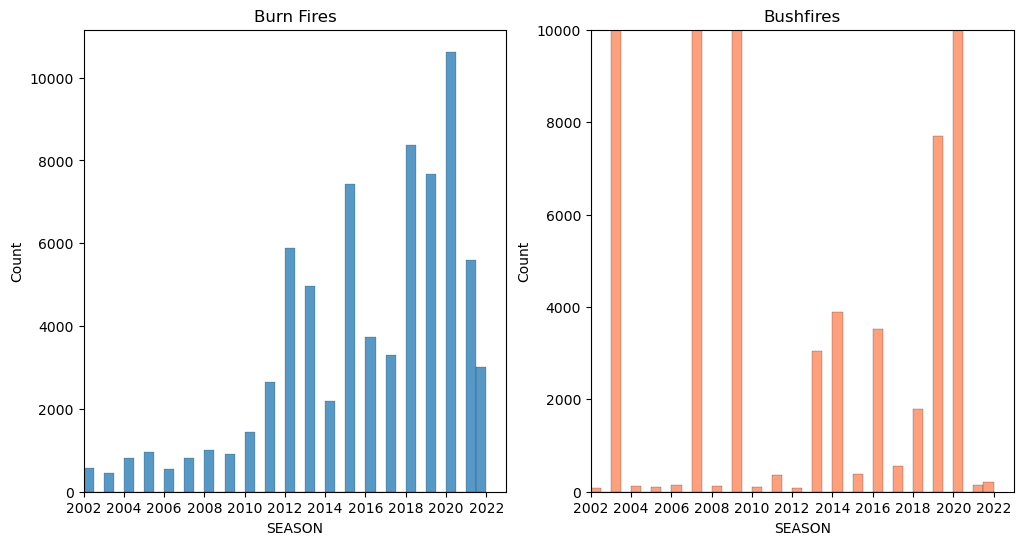

In [4]:
# There are many more bushfires than planned burns, but what about their recent frequency? Let's plot
# these over the last 20 years

burn_history = fire_history[fire_history['FIRETYPE'] == 'Burn']
bushfire_history = fire_history[fire_history['FIRETYPE'] == 'Bushfire']

fig ,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

ax1.set_title('Burn Fires')
sns.histplot(burn_history['SEASON'],label='Burn',ax=ax1,binwidth=0.5)
ax1.set_xlim(2002,2023)
ax1.set_xticks(np.arange(2002,2023,2))

ax2.set_title('Bushfires')
sns.histplot(bushfire_history['SEASON'],label='Fuel',ax=ax2,binwidth=0.5,color='coral')
ax2.set_xlim(2002,2023)
ax2.set_ylim(0,10000)
ax2.set_xticks(np.arange(2002,2023,2))
plt.show()



# So there are many bushfires recorded in bad fire season but few 
# in other years while the number of recorded burns has been increasing 
# recently.  But is this because there a more, smaller burns? Lets work out the  # average area per burn to see.

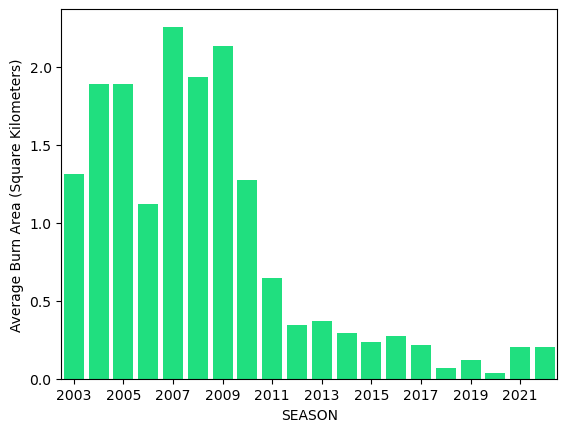

In [5]:
# Convert to a projected crs
burn_history_proj = burn_history.to_crs(3857)
burn_history_proj.loc[:,"AREA"] = burn_history_proj.geometry.area

# Find the average area for the burns each season

burns_by_season = burn_history_proj.groupby('SEASON')['AREA'].mean() / 1e6

# Plot the last 20 years

burns_avg_plot = sns.barplot(x=(burns_by_season.index)[-20:],y=burns_by_season.values[-20:],color='springgreen')
burns_avg_plot.set_ylabel('Average Burn Area (Square Kilometers)')
xtix = burns_avg_plot.get_xticks()
foo = burns_avg_plot.set_xticks(xtix[::2])



In [6]:
# So, indeed the average area of each burn has decreased as the number of burns have increased.

In [ ]:
# Next, lets make some maps. First, let's plot the bushfires from the 2007 season which has the largest number of fires.
# We'll use a map of Victorian CFA regions are a reference, so let's load those as well.

In [13]:
cfa_regions = gpd.read_file("Order_FUP7IO/ll_gda94/esrishape/whole_of_dataset/victoria/VMADMIN/CFA_DISTRICT.shp")
cfa_regions.head()

,UFI,CFA_DIST,UFI_CR,geometry
0,17215569,08,2015-11-18,"MULTIPOLYGON (((145.33417 -38.49738, 145.33492..."
1,17215571,10,2015-11-18,"MULTIPOLYGON (((146.29576 -38.52680, 146.29579..."
2,17215564,02,2015-11-18,"POLYGON ((144.79479 -36.75072, 144.79480 -36.7..."
3,17215581,22,2015-11-18,"POLYGON ((146.17687 -36.03356, 146.17688 -36.0..."
4,17215566,05,2015-11-18,"POLYGON ((142.23505 -37.12818, 142.23514 -37.1..."


<Axes: >

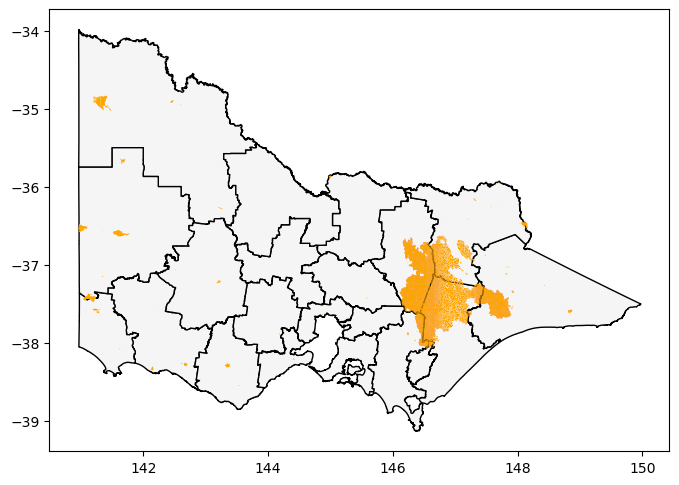

In [14]:
# And now we plot the 2007 bushfires over this map

ax = cfa_regions.plot(figsize=(8,8), color='whitesmoke', edgecolor='black')
fires_2007 = fire_history.loc[(fire_history['SEASON'] == 2007) & (fire_history['FIRETYPE'] == 'Bushfire')]
fires_2007.plot(ax=ax,color='orange',markersize=1)

In [7]:
# Let's also create an interactive map some of our data. What are all the regions present?

fire_history['DISTRICTID'].value_counts()

Hume - Ovens                          34173
Hume - Upper Murray                   25700
Loddon Mallee - Mallee                15209
Gippsland - Macalister                 7825
Gippsland - Snowy                      7472
Gippsland - Tambo                      6679
Gippsland - Latrobe                    3694
Barwon South West - Otways             2935
Hume - Goulburn                        2505
Barwon South West - Far South West     2304
Port Phillip - Yarra                   1648
Grampians - Midlands                   1414
Grampians - Wimmera                     676
Hume - Murrindindi                      540
Loddon Mallee - Murray Goldfields       440
Port Phillip - Metropolitan             270
Name: DISTRICTID, dtype: int64

In [12]:
# Let's choose the Wimmera region of the Grampians and map the location of the different fire types in the 2022 
# season

grampians_fires_2022 = fire_history.query('(DISTRICTID == \'Grampians - Wimmera\') and (SEASON == 2022)')

#new_cmap = 'BlOrRd'
new_cmap = ['blue','orange']
grampians_fires_2022.explore('FIRETYPE',cmap=new_cmap)